## Using Machine Learning to Analyse Poetry

This project is about how unsupervised machine learning techniques can be used to analyse literary forms - like poetry. My motivation for this topic came from my fascination with the idea of [computational creativity'](https://en.wikipedia.org/wiki/Computational_creativity). Computational creativity acknowledges the fact that creativity is part of intelligence, and thus intelligent machines should be able to imitate human creativity. This idea dismisses the argument that the arts are not treatened by automation, and that computers can also imitate our understanding of the arts. Hence, the project will investigate some methods a computer can use to interpret and analyse poetry.

Another source of motivation was the emerging subject of 'digital humanities'. In the words of David Berry from The British Academy: ["Digital humanities incorporate key insights from languages and literature, history, music, media and communications, computer science and information studies and combine these different approaches into new frameworks"](https://www.thebritishacademy.ac.uk/blog/what-are-digital-humanities/). 

I have converted a pdf book of renowned 13th century Persian poet Jalaluddin Rumi to a comma-separated values (CSV) format. This will be put into a pandas data frame before we start the analysis.

In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
poems = pd.read_csv('rumi_poems2.csv');
view = poems[:2]
print(view)#view text 

# view type of object poems is 
type(poems) #pandas data frame

                                           Main_text
0  A moment of happiness,\nyou and I sitting on t...
1  It is the rule with drunkards to fall upon eac...


pandas.core.frame.DataFrame

## Cleaning the data and extracting text 

Next I am going to clean the data as we can see a lot of the text is made of whitespaces and NAs. I am also going to use regular expressions to remove any punctuation and non-alphabetic characters.

In [4]:
import string 
import re
import warnings 
warnings.filterwarnings("ignore") # ignore warnings 
# remove newlines (\n)
poems = poems.replace(r'\n',' ', regex=True) 
#print(poems)
# remove NaN's 
poems.dropna()
# view row of data frame 
pd.options.display.max_colwidth = 700 # change column width to see bigger chunk of poem
# change upper case characters to lower case
# make letters lower case 
poems['Main_text'] = poems['Main_text'].str.lower()
# remove punctuation, though removing punctuation may cause some poem context to be lost
poems['Main_text'] = poems['Main_text'].str.replace(r'[^\w\s\d+]','')   
print(poems.loc[[2]])

                                                                                                                                                                         Main_text
2  a stone i died and rose again a plant a plant i died and rose an animal i died an animal and was born a man why should i fear what have i lost by death mewlana jalaluddin rumi


## Basic Exploration

Now that we have cleaned the pandas data frame containing the poetry text, we can move onto the text analysis of the poetry.

Let's start with some basic exploration of which words are used frequently. Using the keras package we will tokenize the text so that it can be split and put into a list of words for analysis. 

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

poetry = poems.copy(deep=True)

# Define the tokenizer.
tokenizer = Tokenizer(split=' ', num_words = 500)
# Convert the column 'Main_text' to a list of texts properly formatted
alltext = poetry['Main_text'].astype(str).to_list()
# Extract the dictionary of words from the text
tokenizer.fit_on_texts(alltext)

We can see which words are used frequently, many of these are stop words like 'and' and 'the' which we will get rid of later as they may affect our findings.

In [7]:
# Create a dataframe with the word count
dfwords = pd.DataFrame.from_dict(tokenizer.word_counts, orient="index",columns=["frequency"])
# Show the top 15 words
print(dfwords.sort_values(by="frequency", ascending=False).head(10))
dfwords.sort_values(by="frequency", ascending=False).iloc[200:220,:]

      frequency
the        1335
of          695
and         580
i           529
a           485
is          423
to          415
in          387
you         343
that        277


,frequency
youve,14
rise,14
king,14
men,14
joy,14
just,14
ever,14
souls,13
true,13
things,13


In [24]:
# Copy a new dataframe
dfnew = poems.copy(deep=True)
# Define our tokenizer
token = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
# Define our dictionary
token.word_index = {"love":1, "allah":2, "god":3, "garden":4, "light":5,"beloved":6,"drunk":7,"shams":8}
# Get the sequences 
# Apply our token to the texts
sequences = token.texts_to_sequences(poems["Main_text"].astype(str))
# Store the sequences of each review in a new column
poems['Main_text'] = sequences
# Iterate over elements of dictionary token.word_index
for key,val in token.word_index.items():
    # for example, key is "love" and val is 1
    # Create a new column based on that, if val is in the sequence add 1, 0 otherwise
    dfnew[key] = [int(val in x) for x in poems["Main_text"].to_list()]
dfnew

,Main_text,love,allah,god,garden,light,beloved,drunk,shams
0,a moment of happiness you and i sitting on the verandah apparently two but one in soul you and i we feel the flowing water of life here you and i with the gardens beauty and the birds singing the stars will be watching us and we will show them what it is to be a thin crescent moon you and i unselfed will be together indifferent to idle speculation you and i the parrots of heaven will be cracking sugar as we laugh together you and i in one form upon this earth and in another form in a timeless sweet land mewlana jalaluddin rumi,0,0,0,0,0,0,0,0
1,it is the rule with drunkards to fall upon each other to quarrel become violent and make a scene the lover is even worse than a drunkard i will tell you what love is to enter a mine of gold and what is that gold the lover is a king above all kings unafraid of death not at all interested in a golden crown the dervish has a pearl concealed under his patched cloak why should he go begging door to door last night that moon came along drunk dropping clothes in the street quotget upquot i told my heart quotgive the soul a glass of wine the moment has come to join the nightingale in the garden to taste sugar with the soulparrotquot i have fallen with my heart shattered where else but on your p...,1,0,0,1,0,0,1,0
2,a stone i died and rose again a plant a plant i died and rose an animal i died an animal and was born a man why should i fear what have i lost by death mewlana jalaluddin rumi,0,0,0,0,0,0,0,0
3,all through eternity beauty unveils his exquisite form in the solitude of nothingness he holds a mirror to his face and beholds his own beauty he is the knower and the known the seer and the seen no eye but his own has ever looked upon this universe his every quality finds an expression eternity becomes the verdant field of time and space love the lifegiving garden of this world every branch and leaf and fruit reveals an aspect of his perfection they cypress give hint of his majesty the rose gives tidings of his beauty whenever beauty looks love is also there whenever beauty shows a rosy cheek love lights her fire from that flame when beauty dwells in the dark folds of night love comes ...,1,0,0,1,0,0,0,0
4,any lifetime that is spent without seeing the master is either death in disguise or a deep sleep the water that pollutes you is poison the poison that purifies you is water mewlana jalaluddin rumi,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
171,with passion pray with passion work with passion make love with passion eat and drink and dance and play why look like a dead fish in this ocean of god mewlana jalaluddin rumi,1,0,1,0,0,0,0,0
172,you personify gods message you reflect the kings face there is nothing in the universe that you are not everything you want look for it within yourself you are that mewlana jalaluddin rumi,0,0,0,0,0,0,0,0
173,your grief for what youve lost holds a mirror up to where youre bravely working expecting the worst you look and instead heres the joyful face youve been wanting to see your hand opens and closes and opens and closes if it were always a fist or always stretched open you would be paralyzed your deepest presence is in every small contracting and expand the two as beautifully balanced and coordinated as birdwings mewlana jalaluddin rumi,0,0,0,0,0,0,0,0
174,your grief for what youve lost holds a mirror up to where youre bravely working expecting the worst you look and instead heres the joyful face youve been wanting to see your hand opens and closes and opens and closes if it were always a fist or always stretched open you would be paralyzed your deepest presence is in every small contracting and expand the two as beautifully balanced and coordinated as birdwings mewlana jalaluddin rumi,0,0,0,0,0,0,0,0


In [25]:
for key in token.word_index.keys():
    # Calculate in how many poems the word appears.
    num = dfnew[key].sum()
    # Calculate the percentage
    pctg = round(num/len(dfnew[key])*100,2)
    print(key,'appears in', num, 'poems (', pctg, '%)')

love appears in 82 poems ( 46.59 %)
allah appears in 2 poems ( 1.14 %)
god appears in 26 poems ( 14.77 %)
garden appears in 13 poems ( 7.39 %)
light appears in 28 poems ( 15.91 %)
beloved appears in 20 poems ( 11.36 %)
drunk appears in 6 poems ( 3.41 %)
shams appears in 7 poems ( 3.98 %)


## Method 1: Clustering the Words into Topics 

Now that we have preprocessed the data we are going to detect the themes in Rumi's poetry and see which words are often used together. We will use normal k-means clustering. First we need to convert the tokens from our list into vector format using the TfidfVectorizer from sklearn. The TF-IDf converts each word into a vector based on how frequently each word occurs in each documents (from doc 0 to 175), and outputs an array marked by the object X. The values in X are then clustered and centroid is fitted based on the chosen k-means. 

I have chosen K-means clustering because it is one of the most efficient and commonly used methods of clustering all kinds of data. 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
true_k = 14
poem_vectorizer = TfidfVectorizer(stop_words='english') #or TfidfVectorizer(stop_words='english') to excluse stop words
X = poem_vectorizer.fit_transform(alltext)
print(X)
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

  (0, 2428)	0.04381474776315203
  (0, 1549)	0.04508308588905879
  (0, 1835)	0.04508308588905879
  (0, 1630)	0.16362925089471655
  (0, 2815)	0.1396842898715591
  (0, 2920)	0.19640344995427378
  (0, 876)	0.1316526233325544
  (0, 1167)	0.2736354614506767
  (0, 1639)	0.1695919297848956
  (0, 2782)	0.15846414350193258
  (0, 615)	0.21208718384068892
  (0, 1373)	0.12930761160029977
  (0, 2028)	0.19640344995427378
  (0, 2667)	0.21208718384068892
  (0, 1455)	0.21208718384068892
  (0, 1486)	0.19640344995427378
  (0, 3054)	0.21208718384068892
  (0, 1877)	0.12302124172339236
  (0, 632)	0.19640344995427378
  (0, 3141)	0.19640344995427378
  (0, 2708)	0.1695919297848956
  (0, 2598)	0.21208718384068892
  (0, 276)	0.15846414350193258
  (0, 223)	0.1316526233325544
  (0, 1221)	0.16362925089471655
  :	:
  (175, 1909)	0.1522349249326643
  (175, 3026)	0.1522349249326643
  (175, 904)	0.13691933123260508
  (175, 2430)	0.14360962985842804
  (175, 2946)	0.14360962985842804
  (175, 1648)	0.14360962985842804
  (1

KMeans(max_iter=100, n_clusters=15, n_init=1)

I have chosen a k-means of 14 because having a look at the silhouette scores for different K-means values more instability to occur after 14 clusters, without much increase in how close the score gets to 1.

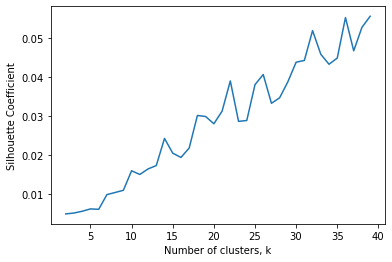

In [17]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k,random_state=1).fit(data)
    predictions = kmeans.predict(data) # Or use kmeans.labels_ 
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

possible_k_values = range(2,40)
errors_per_k = [clustering_errors(k, X) for k in possible_k_values]# Plot each value of k vs. the silhouette score

fig = plt.figure()
ax = plt.axes()
ax.plot(possible_k_values, errors_per_k)
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Coefficient')
plt.show()

The Silhouette Coefficient gets higher as the number of clusters increases. The closer the score is to 1, the better. But too many clusters will make it difficult to see connections between words in the dataset. 

## Results of k-means clustering

Now we can see the results of the k-means clustering by printing the top 15 terms for each cluster. Cluster 0 seems to be related to day and night, since it consists of terms like 'night' and 'awake' and 'sun'. Meanwhile, cluster 3 seems to have more of a romantic tone - with words like 'love', 'flute' and 'thee'. By looking at all of these clusters, we can sense recurring words that are in more than one cluster, such as 'soul' and 'drunkenness', which happen to be words that literary analysts attribute to the themes of Rumi's poetry in general. 

Nevertheless, it is not always easy to identify meanings from the clusters just by looking at them alone, and without knowing the context

In [18]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = poem_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 night
 thousand
 az
 yâ
 ân
 awake
 snare
 sun
 know
 sees
 cage
 tighter
 sleep
 unaware
 bird
Cluster 1:
 said
 love
 bring
 bear
 wild
 like
 went
 allah
 alive
 crazy
 wine
 face
 candle
 sake
 light
Cluster 2:
 like
 mewlana
 jalaluddin
 rumi
 soul
 heart
 ve
 mirror
 passion
 won
 moon
 don
 love
 belly
 having
Cluster 3:
 love
 beloved
 thou
 thy
 lover
 long
 flute
 art
 thee
 dead
 majnun
 gold
 like
 soul
 makes
Cluster 4:
 come
 beloved
 form
 treasure
 sweet
 love
 sea
 life
 end
 true
 oh
 garden
 house
 friend
 lip
Cluster 5:
 say
 ll
 don
 soul
 did
 come
 mouth
 think
 day
 world
 drunkenness
 stop
 grave
 looks
 like
Cluster 6:
 rise
 cease
 kill
 blind
 new
 intelligence
 set
 seed
 journey
 chest
 time
 soul
 youth
 alright
 visions
Cluster 7:
 closes
 opens
 youve
 presence
 disciplined
 working
 coordinated
 paralyzed
 expand
 contracting
 worst
 expecting
 birdwings
 deepest
 bravely
Cluster 8:
 beguile
 win
 form
 says
 bow
 hai

In [20]:
# Create an instance of KMeans to find k clusters
data = poems.copy(deep=True)
k=14 # Choose 9 clusters
kmeans_poems_all = KMeans(n_clusters=k,random_state=2)

#Use fit_predict to cluster the dataset
predict_cluster = kmeans_poems_all.fit_predict(X)

print('Predicted clusters')
print(predict_cluster)

# Add a column to the df for cluster membership
data['Cluster'] = predict_cluster

data.head()

Predicted clusters
[13  0  7  4  7 10  5  5  6  4  6  0  7 14 14  7 12  7 13  1  7  4  1  4
  1  2  8  6  8  8  1 13  9 13  6  5  1  1  6  8  9  7  2  8  8  7 11  5
  7  7  6  6  8  6  7  7 14  5  7  7  3  7  5  7  5  5  7  8  4  7  7  4
  7  7  4  5 13  2  2 13  4  4  6  9  0  6  1  7  7 13  8  8 10  6  7  4
  7  0  6  2  6  1  7 13  7  7  9  7  7 10  0  7 11  6  7  9 14  7  1 13
  7  6  0  7  6  4  9  5 12 12  4 12  2  4  7 13  8  4  5  7 13  7  7 10
 10  3  7  8  8  7 11 11 13  7  6  7 14  0  0  8  7 13  6  1 13  8  8  7
  1  1  1 10  7  3  3  1]


,Main_text,Cluster
0,"a moment of happiness, you and i sitting on the verandah, apparently two, but one in soul, you and i. we feel the flowing water of life here, you and i, with the garden's beauty and the birds singing. the stars will be watching us, and we will show them what it is to be a thin crescent moon. you and i unselfed, will be together, indifferent to idle speculation, you and i. the parrots of heaven will be cracking sugar as we laugh together, you and i. in one form upon this earth, and in another form in a timeless sweet land. mewlana jalaluddin rumi",13
1,"it is the rule with drunkards to fall upon each other, to quarrel, become violent, and make a scene. the lover is even worse than a drunkard. i will tell you what love is: to enter a mine of gold. and what is that gold? the lover is a king above all kings, unafraid of death, not at all interested in a golden crown. the dervish has a pearl concealed under his patched cloak. why should he go begging door to door? last night that moon came along, drunk, dropping clothes in the street. &quot;get up,&quot; i told my heart, &quot;give the soul a glass of wine. the moment has come to join the nightingale in the garden, to taste sugar with the soul-parrot.&quot; i have fallen, with my heart shat...",0
2,a stone i died and rose again a plant; a plant i died and rose an animal; i died an animal and was born a man. why should i fear? what have i lost by death? mewlana jalaluddin rumi,7
3,"all through eternity beauty unveils his exquisite form in the solitude of nothingness; he holds a mirror to his face and beholds his own beauty. he is the knower and the known, the seer and the seen; no eye but his own has ever looked upon this universe. his every quality finds an expression: eternity becomes the verdant field of time and space; love, the life-giving garden of this world. every branch and leaf and fruit reveals an aspect of his perfection- they cypress give hint of his majesty, the rose gives tidings of his beauty. whenever beauty looks, love is also there; whenever beauty shows a rosy cheek love lights her fire from that flame. when beauty dwells in the dark folds of n...",4
4,any lifetime that is spent without seeing the master is either death in disguise or a deep sleep. the water that pollutes you is poison; the poison that purifies you is water. mewlana jalaluddin rumi,7


As shown above, we can also predict which cluster (when there are only 15 rather than one for each document) a poem would be attributed to.

## Visualising the clusters

I have also peformed k-means clustering with a data visualisation of the some of the words and which cluster they were attributed to. It can be seen that there is a high level of inertia in some of the clusters as words from different clusters are often close together.

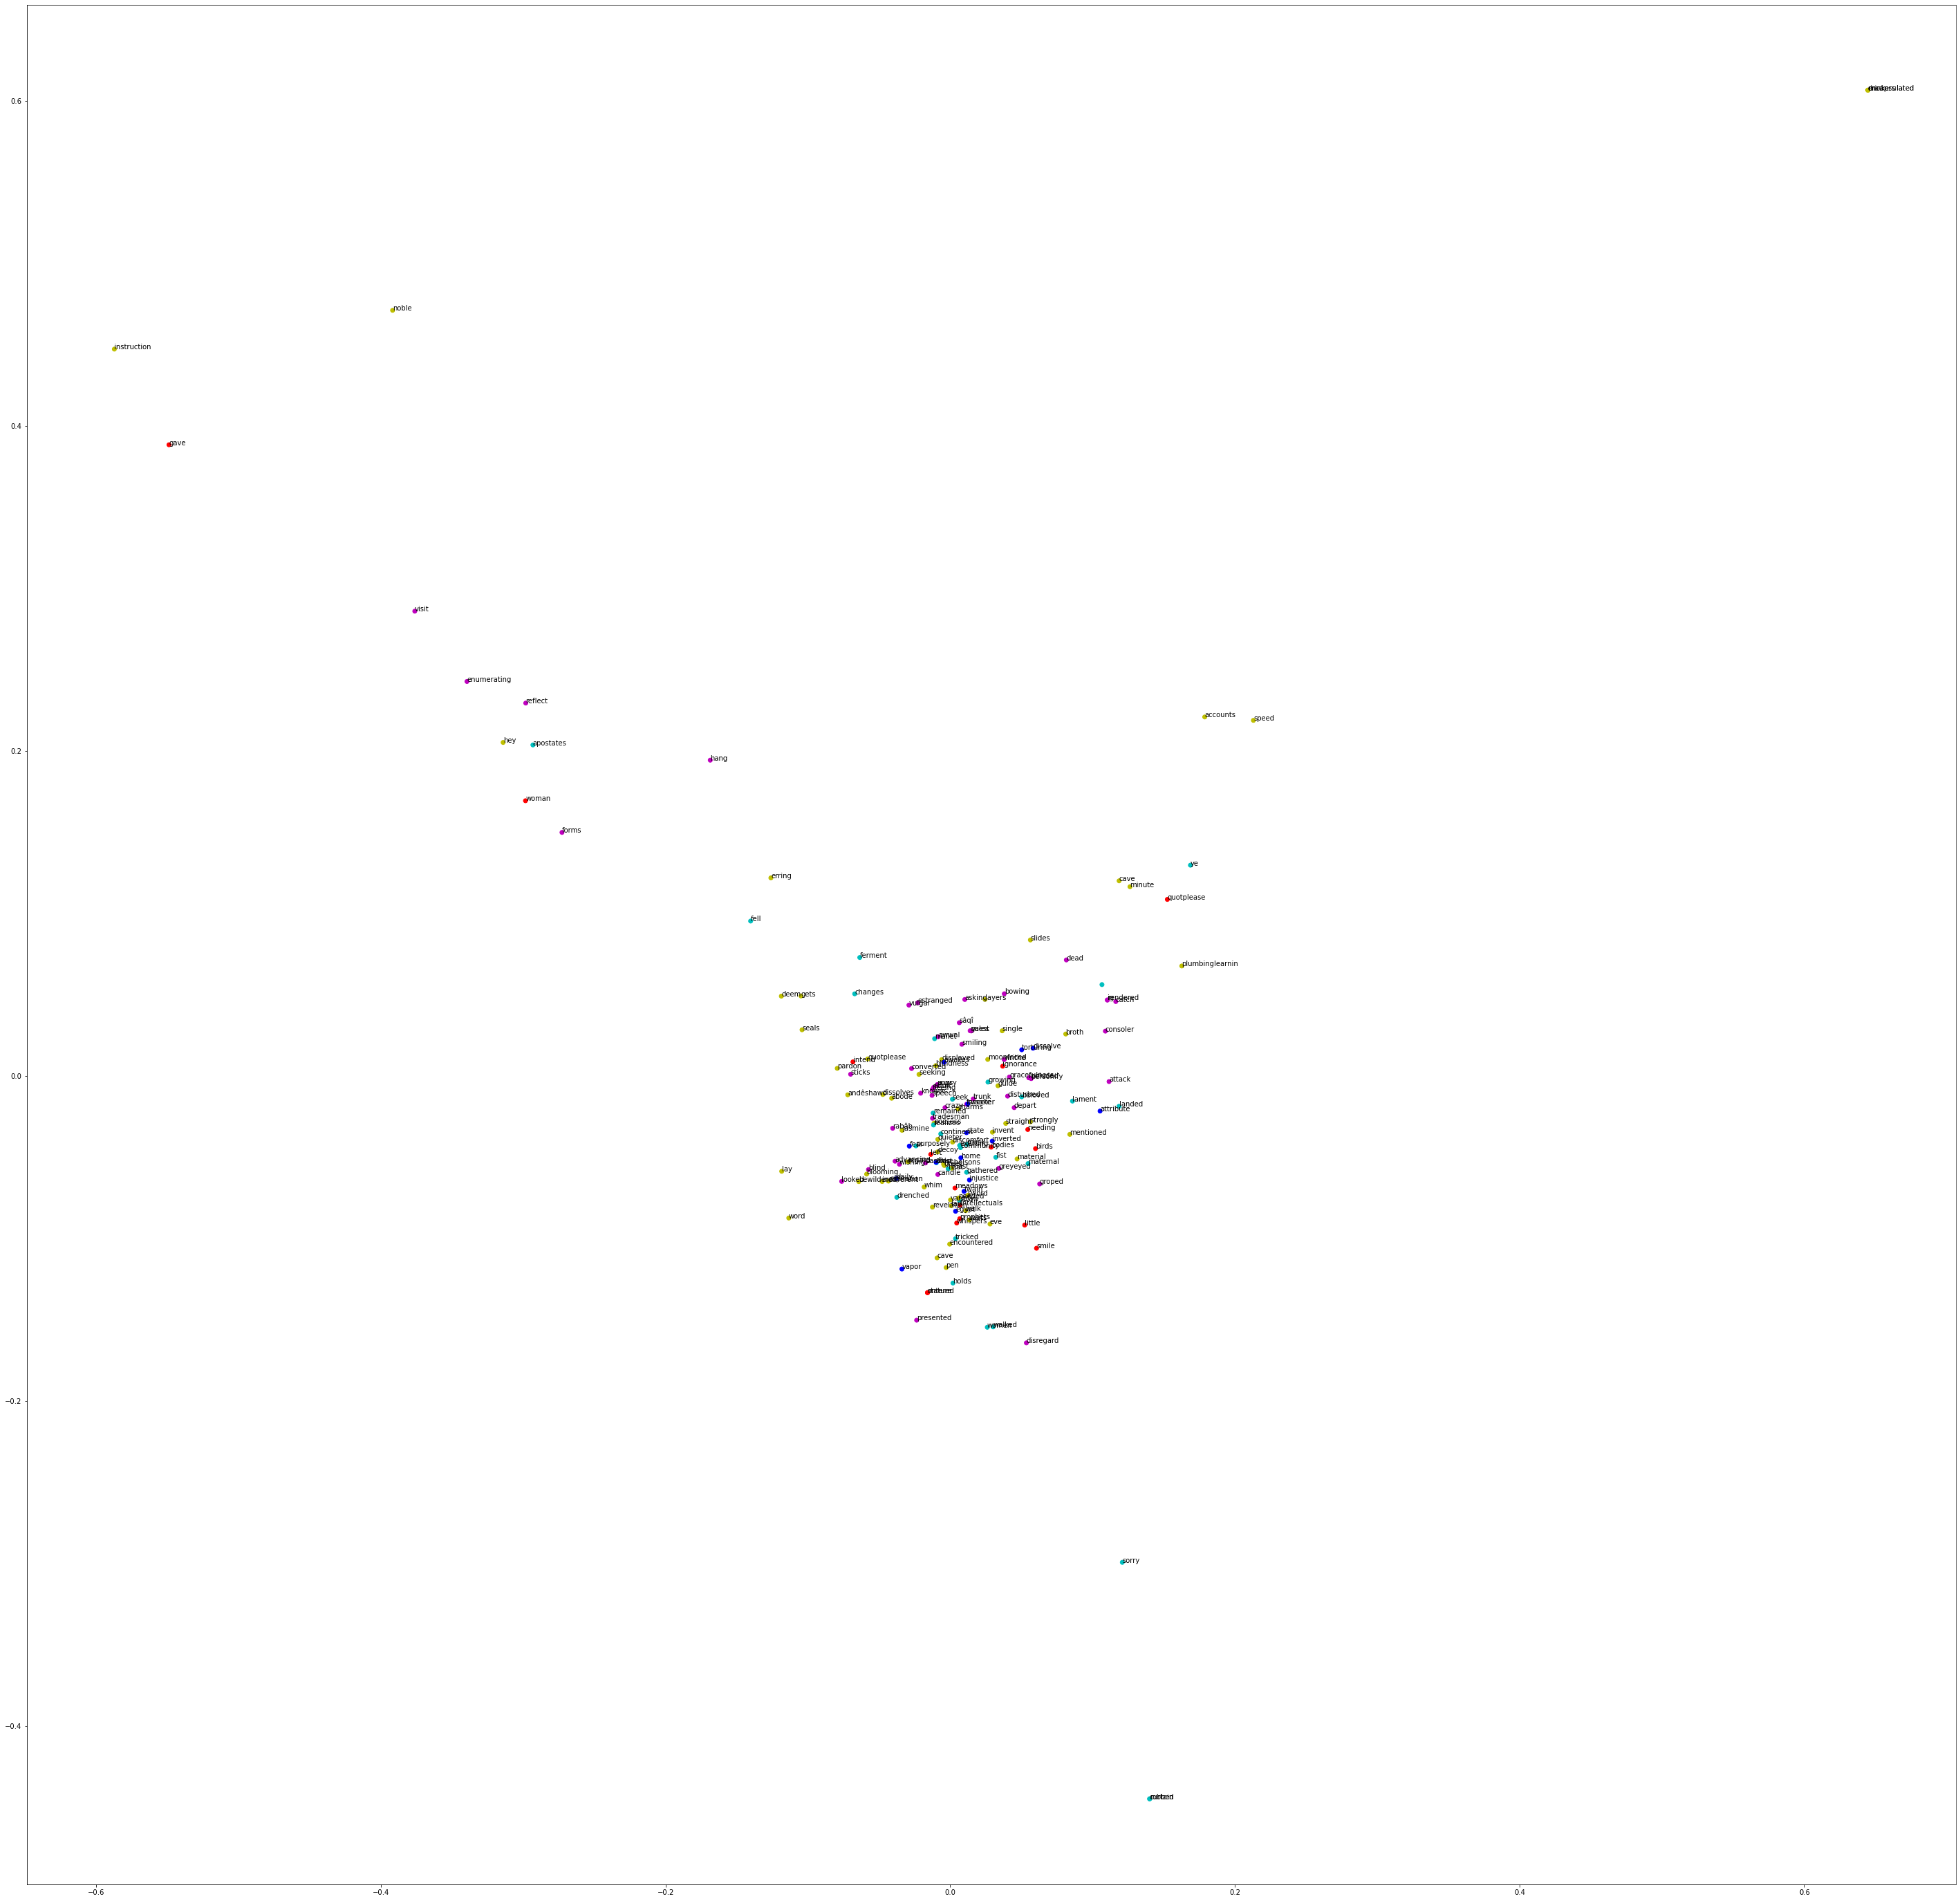

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import random
true_k2 = 5
terms2 = poem_vectorizer.get_feature_names()
model2 = KMeans(n_clusters=true_k2, init='k-means++', max_iter=100, n_init=1)
kmeans_indicies = model2.fit_predict(X)
pca = PCA(n_components=5) # principal component analysis 
scatter_plot_points = pca.fit_transform(X.toarray())
colours = ["r","c","y","b","m"]
x_axis = [v[0] for v in scatter_plot_points]
y_axis = [v[1] for v in scatter_plot_points]
fig,ax = plt.subplots(figsize=(50,50))
# Reduce size of term list.
terms2 = random.choices(terms2, k=175)
ax.scatter(x_axis, y_axis, c=[colours[d] for d in kmeans_indicies])
for i, txt in enumerate(terms2):
    ax.annotate(txt[0:15], (x_axis[i], y_axis[i]))
plt.savefig("kmeans.png")

## Topic Modelling
Lastly, we are going to build a topic model using the NMF model. NMF topic modelling uses non-negative matrix factorisation to calculate the weightings of words in a document and place the top terms in a topic based on the ones with the highest weightings. It uses linear algebra to create topics. I have chosen NMF topic modelling because it does not require as much memory usage as LDA (Latent Dirichlecht Allocation) topic modelling. This is how NMF works:

In [71]:
from sklearn.decomposition import NMF
k = 15
nmf  = NMF(n_components = 50)
nmf.fit(X) # fit vectors from previous k-means clustering model to NMF model 
for i in range(0,k):
    word_list=[]
    print("Topic%d:"% i)
    for j in nmf.components_.argsort()[i,-30:-1]:
        word_list.append(terms[j])
    print(word_list)

Topic0:
['seeker', 'perfect', 'opinion', 'seal', 'chain', 'tabriz', 'blessed', 'reed', 'dead', 'acts', 'head', 'stars', 'body', 'silent', 'soul', 'set', 'blue', 'sake', 'bear', 'means', 'lip', 'tall', 'jacob', 'wax', 'knot', 'twisted', 'hand', 'shall', 'asks']
Topic1:
['smoke', 'star', 'salvation', 'crazy', 'mad', 'witness', 'tied', 'came', 'evening', 'lion', 'laughing', 'belong', 'broke', 'teacher', 'face', 'tender', 'dead', 'weeping', 'joyfulness', 'layer', 'fierce', 'wings', 'power', 'stay', 'candle', 'love', 'alive', 'went', 'wild']
Topic2:
['doing', 'soul', 'think', 'drunkenness', 'sitting', 'plan', 'sure', 'stop', 'voice', 'tavern', 'hears', 'began', 'answer', 'brought', 'sip', 'quiet', 'idea', 'supposed', 'aviary', 'accord', 'asking', 'drunks', 'rarely', 'sober', 'intend', 'continent', 'didn', 'come', 'day']
Topic3:
['articulating', 'giving', 'timelessness', 'sipping', 'disciplined', 'ray', 'companions', 'judging', 'sadness', 'caring', 'mirthful', 'presence', 'imagination', 'tod